<a href="https://colab.research.google.com/github/pythonwithzeeshan/learn-lessons/blob/main/LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Libraries**

In [7]:
# PyTorch aur numpy import
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd



**Dataset Creation**

In [8]:
df = pd.read_csv('diabetes_dataset.csv')
print("First 5 rows of dataset:")
print(df.head())

First 5 rows of dataset:
         BMI        Age  Has_Diabetes
0  22.993428  22.923146           0.0
1  21.723471  27.896773           0.0
2  23.295377  28.286427           0.0
3  25.046060  25.988614           0.0
4  21.531693  29.193571           0.0


In [9]:
X = df[['BMI', 'Age']].values
y = df['Has_Diabetes'].values

In [10]:
df_no = df[df['Has_Diabetes']==0]
df_yes = df[df['Has_Diabetes']==1]

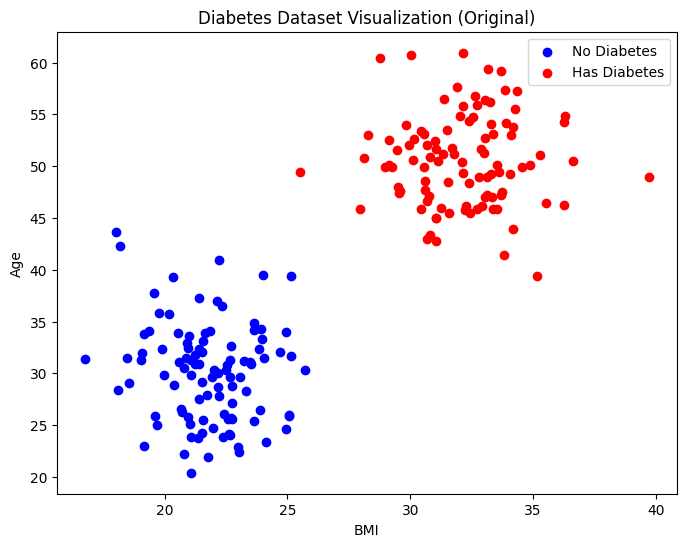

In [11]:
plt.figure(figsize=(8,6))
plt.scatter(df_no['BMI'], df_no['Age'], color='blue', label='No Diabetes')
plt.scatter(df_yes['BMI'], df_yes['Age'], color='red', label='Has Diabetes')
plt.xlabel('BMI')
plt.ylabel('Age')
plt.title('Diabetes Dataset Visualization (Original)')
plt.legend()
plt.show()

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [13]:
X_train_scaled,X_test_scaled

(array([[-1.62222966,  0.2748897 ],
        [ 1.01534356,  1.44187825],
        [-1.38381952, -0.56994392],
        [-1.10042323, -0.67037656],
        [ 1.15236269,  0.47942822],
        [ 0.65370239,  0.63408936],
        [-1.0090596 , -1.15350079],
        [-1.41423357, -0.59723175],
        [ 1.2172619 ,  0.61735465],
        [-0.5726153 , -0.72072112],
        [ 0.79024413,  1.42043516],
        [ 0.90793456,  1.2670311 ],
        [-0.98824904, -0.75137763],
        [ 0.92747608,  1.35513673],
        [ 0.81860918,  0.70450157],
        [-0.33787192, -0.779248  ],
        [ 0.61768643,  0.47765595],
        [-0.90174433, -0.90461958],
        [ 1.32479459,  1.48497894],
        [-0.79652629, -1.32204719],
        [ 0.95150593,  0.49946108],
        [-0.80920459, -0.86229647],
        [-0.23387318, -0.90003163],
        [-0.81610796, -0.90372386],
        [-1.34500821, -0.24363895],
        [ 0.93383751,  0.78431402],
        [-0.94540762, -1.64268431],
        [ 0.67908793,  0.586

**Convert into Tensor**

In [14]:
X_train_tensor = torch.FloatTensor(X_train_scaled)
X_test_tensor = torch.FloatTensor(X_test_scaled)
y_train_tensor = torch.FloatTensor(y_train).view(-1,1)
y_test_tensor = torch.FloatTensor(y_test).view(-1,1)

In [15]:
X_train_tensor,X_test_tensor,y_train_tensor,y_test_tensor

(tensor([[-1.6222,  0.2749],
         [ 1.0153,  1.4419],
         [-1.3838, -0.5699],
         [-1.1004, -0.6704],
         [ 1.1524,  0.4794],
         [ 0.6537,  0.6341],
         [-1.0091, -1.1535],
         [-1.4142, -0.5972],
         [ 1.2173,  0.6174],
         [-0.5726, -0.7207],
         [ 0.7902,  1.4204],
         [ 0.9079,  1.2670],
         [-0.9882, -0.7514],
         [ 0.9275,  1.3551],
         [ 0.8186,  0.7045],
         [-0.3379, -0.7792],
         [ 0.6177,  0.4777],
         [-0.9017, -0.9046],
         [ 1.3248,  1.4850],
         [-0.7965, -1.3220],
         [ 0.9515,  0.4995],
         [-0.8092, -0.8623],
         [-0.2339, -0.9000],
         [-0.8161, -0.9037],
         [-1.3450, -0.2436],
         [ 0.9338,  0.7843],
         [-0.9454, -1.6427],
         [ 0.6791,  0.5864],
         [-0.8685, -1.1283],
         [ 0.1720,  0.4762],
         [-1.0428, -0.7769],
         [ 0.5146,  1.1928],
         [-0.2677,  0.7938],
         [-0.8416, -0.3512],
         [ 0.7

**Visualize scaled data**

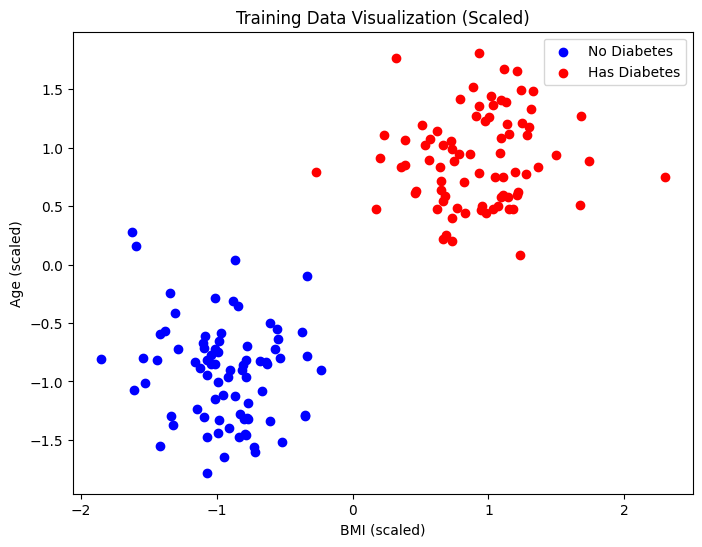

In [16]:
plt.figure(figsize=(8,6))
plt.scatter(X_train_scaled[y_train==0,0], X_train_scaled[y_train==0,1], color='blue', label='No Diabetes')
plt.scatter(X_train_scaled[y_train==1,0], X_train_scaled[y_train==1,1], color='red', label='Has Diabetes')
plt.xlabel('BMI (scaled)')
plt.ylabel('Age (scaled)')
plt.title('Training Data Visualization (Scaled)')
plt.legend()
plt.show()

**Logistic Regression Model**

In [17]:
class LogisticRegressionModel(nn.Module):
    def __init__(self, input_dim):
        super(LogisticRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim,1)

    def forward(self, x):
        return torch.sigmoid(self.linear(x))

model = LogisticRegressionModel(X_train_tensor.shape[1])
print(model)

LogisticRegressionModel(
  (linear): Linear(in_features=2, out_features=1, bias=True)
)


**Loss and Optimizer**

In [18]:
criterion = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)


**Model Training**

In [19]:
num_epochs = 1000
loss_list = []

In [20]:
for epoch in range(num_epochs):
    # Forward
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)

    # Backward
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    loss_list.append(loss.item())

    if (epoch+1) % 100 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")

Epoch [100/1000], Loss: 0.0916
Epoch [200/1000], Loss: 0.0499
Epoch [300/1000], Loss: 0.0354
Epoch [400/1000], Loss: 0.0280
Epoch [500/1000], Loss: 0.0233
Epoch [600/1000], Loss: 0.0202
Epoch [700/1000], Loss: 0.0179
Epoch [800/1000], Loss: 0.0161
Epoch [900/1000], Loss: 0.0147
Epoch [1000/1000], Loss: 0.0135


**Visualize Loss**

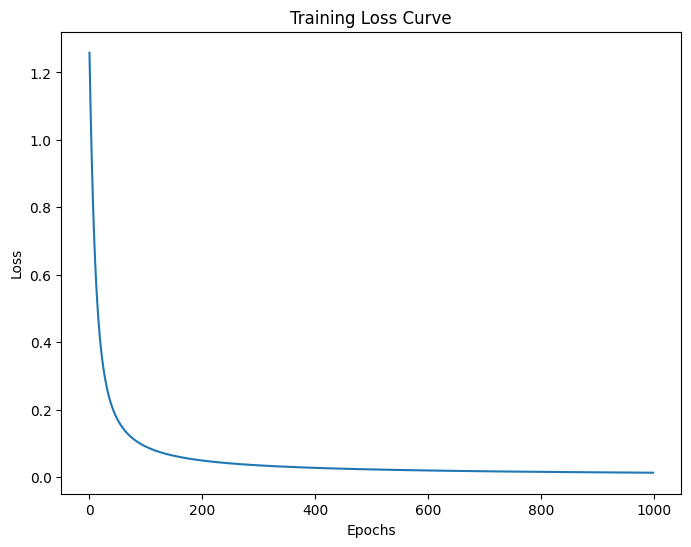

In [21]:
plt.figure(figsize=(8,6))
plt.plot(loss_list)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss Curve')
plt.show()

**Visualize Decision Boundary**